[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.11909735 12.45829699  2.44077575  8.05058764  8.5197982  12.92750755
 19.739422    6.51629395  4.11208885 12.92750755 15.33171265  5.64638254
 14.1296101  10.9240033  14.9310118   8.5197982   6.44778424 10.9240033
 16.13311435  5.3141914  14.53031095 16.13311435 15.26320294  4.5127897
  4.11208885 20.14012285 10.45479274  9.72190075 17.26670719 10.52330245
  7.24918594  8.11909735 15.7324135  12.92750755  6.04708339  4.11208885
 -1.1655319  15.33171265 12.92750755  6.9169948   4.84498084  9.72190075
 14.06110039  8.5197982  16.5338152  10.1226016  11.32470415 14.06110039
 11.65689529 16.93451605 13.72890925 15.33171265 10.52330245  8.5197982
  4.04357915 11.25619444 10.9240033   2.9099863  16.1331

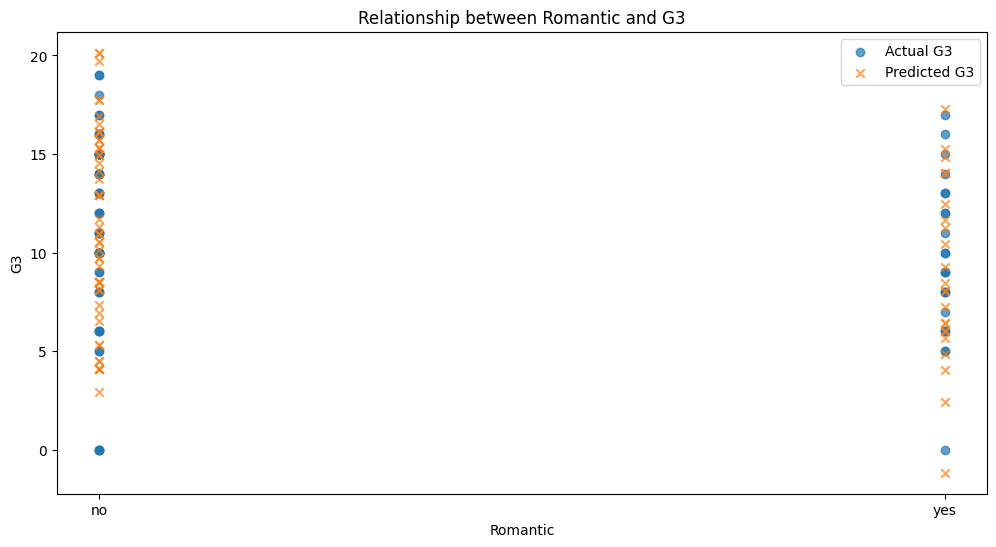

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['romantic', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'romantic'
data = pd.get_dummies(data, columns=['romantic'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'romantic_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'romantic' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Romantic': df.loc[X_test.index, 'romantic'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'romantic' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Romantic'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Romantic'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Romantic')
plt.ylabel('G3')
plt.title('Relationship between Romantic and G3')
plt.legend()
plt.show()
